In [68]:
#-1 data read, clean
#-2-compare total cost and number of projetcs between all county in California 
#-3 filter for losangles and compare the data in pojetc status level 


In [1]:
##Import needed libraries
import pandas as pd 
#-vase keshidan nemodar 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Read CSV File and Load the data in Dataframe
#"""The Office of Statewide Health Planning and Development (OSHPD) announces a new chapter in our history. With Governor Gavin Newsom signing the 2021-2022 Budget and trailer bills, OSHPD becomes the Department of Health Care Access and Information (HCAI)."""


file_path = 'Construction Health Cost  - Data.csv'

#Read the CSV file into a pandas DataFrame
df= pd.read_csv(file_path)

df.head(10)

,County,Data Generation Date,OSHPD Project Status,Total Costs of OSHPD Projects,Number of OSHPD Projects,Avg Cost Per projetc,Collection of Counties
0,01 - Alameda,10/14/2013,In Review,"$50,890,315.00",44,NaN,Bay Area Counties
1,01 - Alameda,10/14/2013,Pending Construction,"$840,242,543.36",125,NaN,Bay Area Counties
2,01 - Alameda,10/14/2013,In Construction,"$994,245,713.95",181,NaN,Bay Area Counties
3,01 - Alameda,10/14/2013,In Closure,"$65,337,613.88",82,NaN,Bay Area Counties
4,02 - Alpine,10/14/2013,In Review,$0.00,0,NaN,NaN
5,02 - Alpine,10/14/2013,Pending Construction,$0.00,0,NaN,NaN
6,02 - Alpine,10/14/2013,In Construction,$0.00,0,NaN,NaN
7,02 - Alpine,10/14/2013,In Closure,$0.00,0,NaN,NaN
8,03 - Amador,10/14/2013,In Review,"$1,610,809.00",2,NaN,NaN
9,03 - Amador,10/14/2013,Pending Construction,$0.00,0,NaN,NaN


# Checking Null Values: 
How many Null Values the data has?


In [4]:
null_values = df.isnull()


# Count the number of null values in each column
null_counts = null_values.sum()

# Display the result
print("Null values in each column:")
print(null_counts)

Null values in each column:
County                               0
Data Generation Date                 0
OSHPD Project Status                 0
Total Costs of OSHPD Projects        0
Number of OSHPD Projects             0
Avg Cost Per projetc             39900
Collection of Counties           29400
dtype: int64


# Data Type
What is the data type of each columns?


In [5]:
column1s_type = df.dtypes
column1s_type

County                           object
Data Generation Date             object
OSHPD Project Status             object
Total Costs of OSHPD Projects    object
Number of OSHPD Projects          int64
Avg Cost Per projetc             object
Collection of Counties           object
dtype: object

# Data cleaning : Change Columns data type

In [8]:
df['Total Costs of OSHPD Projects'] = pd.to_numeric(df['Total Costs of OSHPD Projects'].replace('[\$,]', '', regex=True), errors='coerce')

# Extract month and year from 'Data Generation Date'
df['Month'] = pd.to_datetime(df['Data Generation Date'], format='%m/%d/%Y').dt.to_period('M')
df['Quarter'] = pd.to_datetime(df['Data Generation Date'], format='%m/%d/%Y').dt.to_period('Q')

df.head(5)

,County,Data Generation Date,OSHPD Project Status,Total Costs of OSHPD Projects,Number of OSHPD Projects,Avg Cost Per projetc,Collection of Counties,Month,Quarter
0,01 - Alameda,10/14/2013,In Review,5.089032e+07,44,NaN,Bay Area Counties,2013-10,2013Q4
1,01 - Alameda,10/14/2013,Pending Construction,8.402425e+08,125,NaN,Bay Area Counties,2013-10,2013Q4
2,01 - Alameda,10/14/2013,In Construction,9.942457e+08,181,NaN,Bay Area Counties,2013-10,2013Q4
3,01 - Alameda,10/14/2013,In Closure,6.533761e+07,82,NaN,Bay Area Counties,2013-10,2013Q4
4,02 - Alpine,10/14/2013,In Review,0.000000e+00,0,NaN,NaN,2013-10,2013Q4


## Analysis at the Top County Level (Top 5 County)
Determine the top 5 counties in California based on the total cost of projects per quarter.

## A: Total Cost of Projetcs by Quarter

/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/2081534461.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation=45)


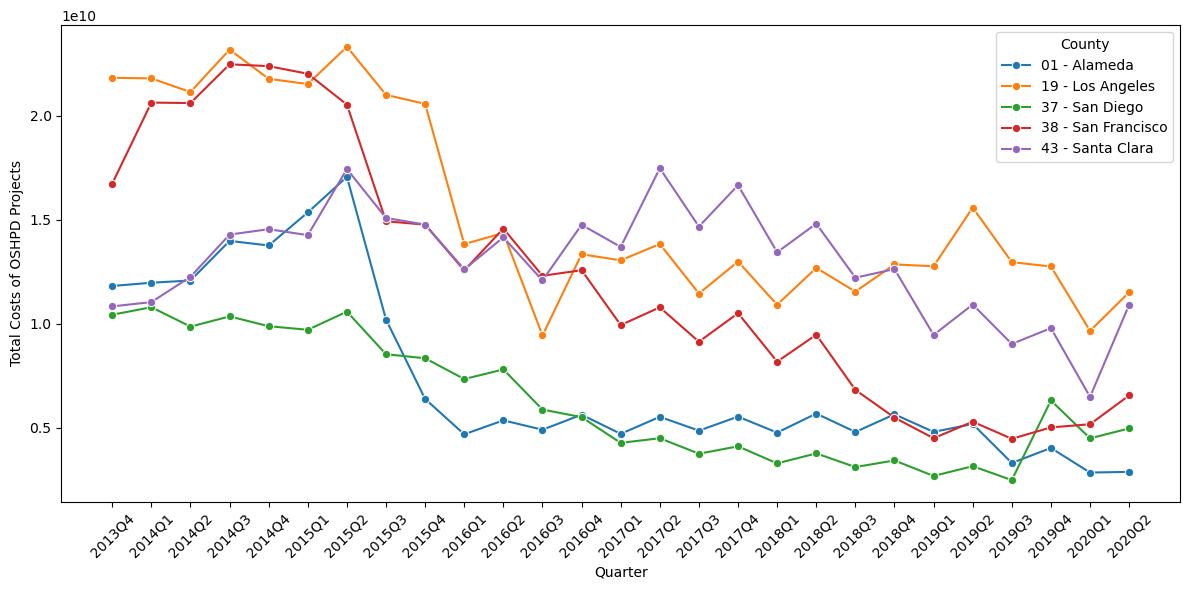

In [21]:
plt.figure(figsize=(12, 6))

# Determine the top 5 counties based on the total costs
top_5_counties = df.groupby('County')['Total Costs of OSHPD Projects'].sum().nlargest(5).index.tolist()

# Filter the dataframe to include only these top 10 counties
plot_df = df[df['County'].isin(top_5_counties)]

# Group by Quarter and County, then reset the index
plot_df = plot_df[['County', 'OSHPD Project Status', 'Total Costs of OSHPD Projects', 'Number of OSHPD Projects', 'Quarter']]
plot_df = plot_df.groupby(['Quarter', 'County']).sum().reset_index()
plot_df['Quarter'] = plot_df['Quarter'].astype(str)

# Create the plot
f = sns.lineplot(data=plot_df, 
                 x='Quarter',
                 y='Total Costs of OSHPD Projects',
                 hue='County',
                 marker='o')

f.set_xticklabels(labels=x_ticks, rotation=45)
plt.tight_layout()
plt.show()


## B: Number of Projetcs by Quarter

/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/2470261715.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation=45)


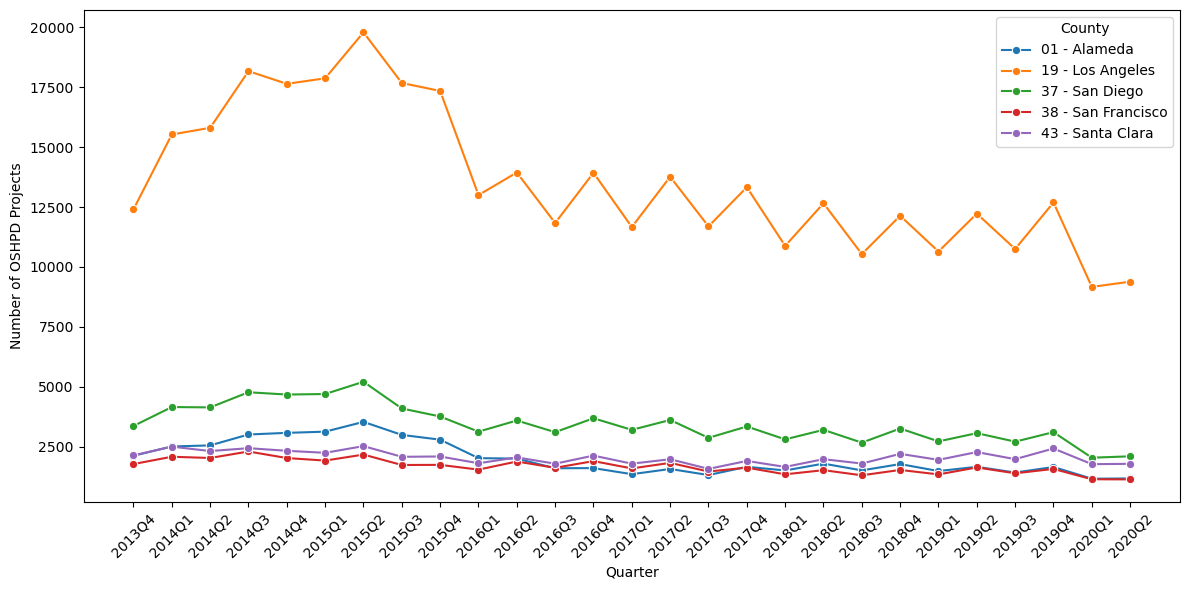

In [20]:
plt.figure(figsize=(12, 6))

# Determine the top 5 counties based on the total costs
top_5_counties = df.groupby('County')['Total Costs of OSHPD Projects'].sum().nlargest(5).index.tolist()

# Filter the dataframe to include only these top 10 counties
plot_df = df[df['County'].isin(top_5_counties)]

# Group by Quarter and County, then reset the index
plot_df = plot_df[['County', 'OSHPD Project Status', 'Total Costs of OSHPD Projects', 'Number of OSHPD Projects', 'Quarter']]
plot_df = plot_df.groupby(['Quarter', 'County']).sum().reset_index()
plot_df['Quarter'] = plot_df['Quarter'].astype(str)

# Create the plot
f = sns.lineplot(data=plot_df, 
                 x='Quarter',
                 y='Number of OSHPD Projects',
                 hue='County',
                 marker='o')

f.set_xticklabels(labels=x_ticks, rotation=45)
plt.tight_layout()
plt.show()

## C: Avarage Cost of Projetcs by Quarter

/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/2513108386.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation=45)


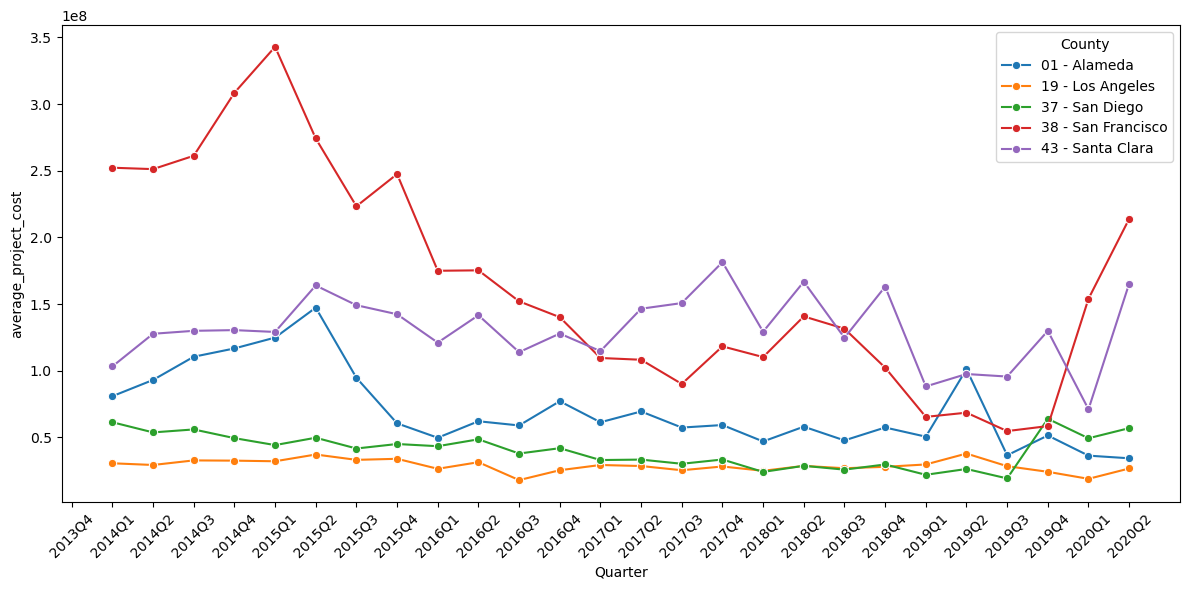

In [23]:
plt.figure(figsize=(12, 6))

# Determine the top 5 counties based on the total costs
top_5_counties = df.groupby('County')['Total Costs of OSHPD Projects'].sum().nlargest(5).index.tolist()

# Filter the dataframe to include only these top 10 counties
plot_df = df[df['County'].isin(top_5_counties)]

# Group by Quarter and County, then reset the index
plot_df = plot_df[['County', 'OSHPD Project Status', 'Total Costs of OSHPD Projects', 'Number of OSHPD Projects', 'Quarter']]
plot_df['average_project_cost'] = plot_df['Total Costs of OSHPD Projects'] / plot_df['Number of OSHPD Projects']
Ca_Avg_Cost= plot_df.copy()

plot_df = plot_df.groupby(['Quarter', 'County']).sum().reset_index()

plot_df['Quarter'] = plot_df['Quarter'].astype(str)

# Create the plot
f = sns.lineplot(data=plot_df, 
                 x='Quarter',
                 y='average_project_cost',
                 hue='County',
                 marker='o')



f.set_xticklabels(labels=x_ticks, rotation=45)
plt.tight_layout()
plt.show()

# Filter Data frame for Los Angeles County

In [11]:
# Filter rows for Los Angeles County
Los_angeles_df = df[df['County'] == '19 - Los Angeles'] 
Los_angeles_df.head(10)

,County,Data Generation Date,OSHPD Project Status,Total Costs of OSHPD Projects,Number of OSHPD Projects,Avg Cost Per projetc,Collection of Counties,Month,Quarter
72,19 - Los Angeles,10/14/2013,In Review,5.423436e+08,432,"$1,255,424.98",Greater Los Angeles Counties,2013-10,2013Q4
73,19 - Los Angeles,10/14/2013,Pending Construction,2.380242e+08,562,"$423,530.65",Greater Los Angeles Counties,2013-10,2013Q4
74,19 - Los Angeles,10/14/2013,In Construction,2.339841e+09,843,"$2,775,612.01",Greater Los Angeles Counties,2013-10,2013Q4
75,19 - Los Angeles,10/14/2013,In Closure,5.723791e+08,655,"$873,861.19",Greater Los Angeles Counties,2013-10,2013Q4
304,19 - Los Angeles,10/15/2013,In Review,5.407703e+08,0,#DIV/0!,Greater Los Angeles Counties,2013-10,2013Q4
305,19 - Los Angeles,10/15/2013,Pending Construction,2.397786e+08,0,#DIV/0!,Greater Los Angeles Counties,2013-10,2013Q4
306,19 - Los Angeles,10/15/2013,In Construction,2.339587e+09,0,#DIV/0!,Greater Los Angeles Counties,2013-10,2013Q4
307,19 - Los Angeles,10/15/2013,In Closure,5.723320e+08,0,#DIV/0!,Greater Los Angeles Counties,2013-10,2013Q4
536,19 - Los Angeles,10/31/2013,In Review,5.150035e+08,408,"$1,262,263.50",Greater Los Angeles Counties,2013-10,2013Q4
537,19 - Los Angeles,10/31/2013,Pending Construction,2.063881e+08,500,"$412,776.19",Greater Los Angeles Counties,2013-10,2013Q4


# Comparing Cost & number of Los Angeles Construction Projects By Status by Quarter

## a: Trends Over Time: Total Cost vs. Total Count of Projects

/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/3088540255.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation = 45);


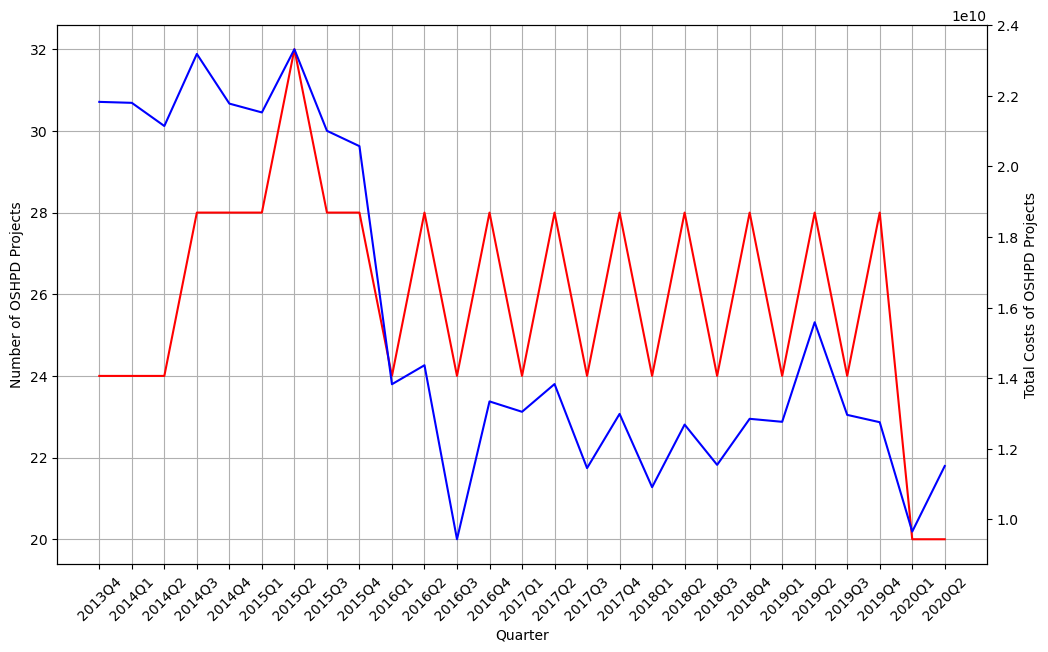

In [12]:
# use sns Libraray sns
plot_df = Los_angeles_df.copy()
column = 'Total Costs of OSHPD Projects'
# change the Quarter format from date to object
plot_df['Quarter'] = plot_df['Quarter'].astype(str)

fig, ax = plt.subplots(figsize = (12, 7))
plt.grid(True)


f = sns.lineplot(data = plot_df[[column, 'Quarter']].groupby('Quarter').count().reset_index(), x = 'Quarter', y = column, color = 'red', ax = ax)
f.set_ylabel('Number of OSHPD Projects')

ax2 = ax.twinx()
g = sns.lineplot(data = plot_df[[column, 'Quarter']].groupby('Quarter').sum().reset_index(), 
                 x = 'Quarter', y = column, color = 'blue', ax = ax2)


x_ticks = plot_df[[column, 'Quarter']].groupby('Quarter').sum().reset_index()['Quarter'].values
g.set_xticklabels(labels=[], rotation = 45);
f.set_xticklabels(labels=x_ticks, rotation = 45);


# b: Total Cost by Quarter, Broken Down by Project Status

/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/1623541205.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation = 45);


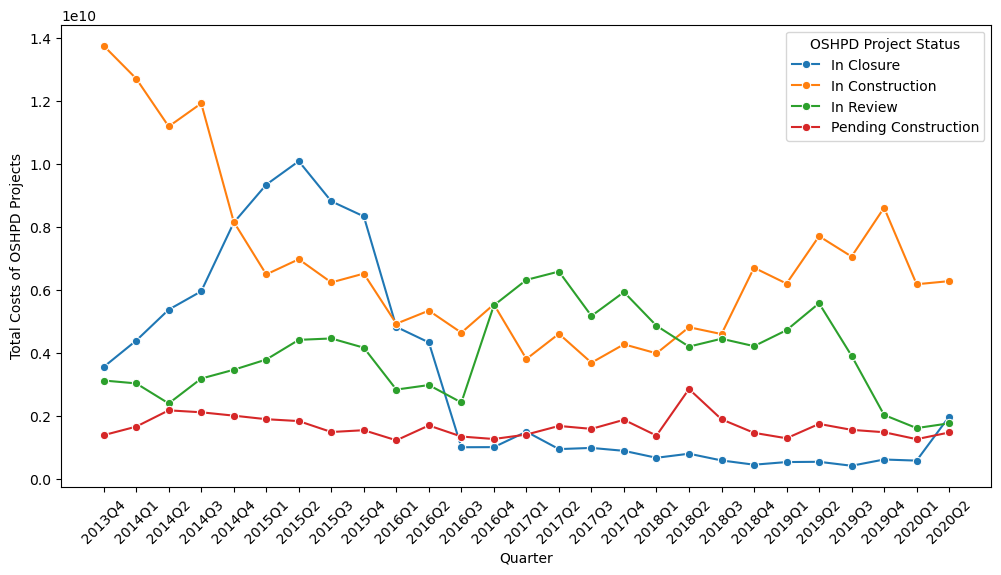

In [13]:
plt.figure(figsize=(12, 6))
plot_df = Los_angeles_df[['OSHPD Project Status',
       'Total Costs of OSHPD Projects', 'Number of OSHPD Projects', 'Quarter']].groupby(['Quarter', 'OSHPD Project Status']).sum().reset_index()
plot_df['Quarter'] = plot_df['Quarter'].astype(str)
f = sns.lineplot(data=plot_df, 
                 x = 'Quarter',
                 y = 'Total Costs of OSHPD Projects', 
         hue = 'OSHPD Project Status', 
         marker='o')
f.set_xticklabels(labels=x_ticks, rotation = 45);

# b: Number of Projetcs by Quarter, Broken Down by Project Status


/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/2440824249.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation = 45);


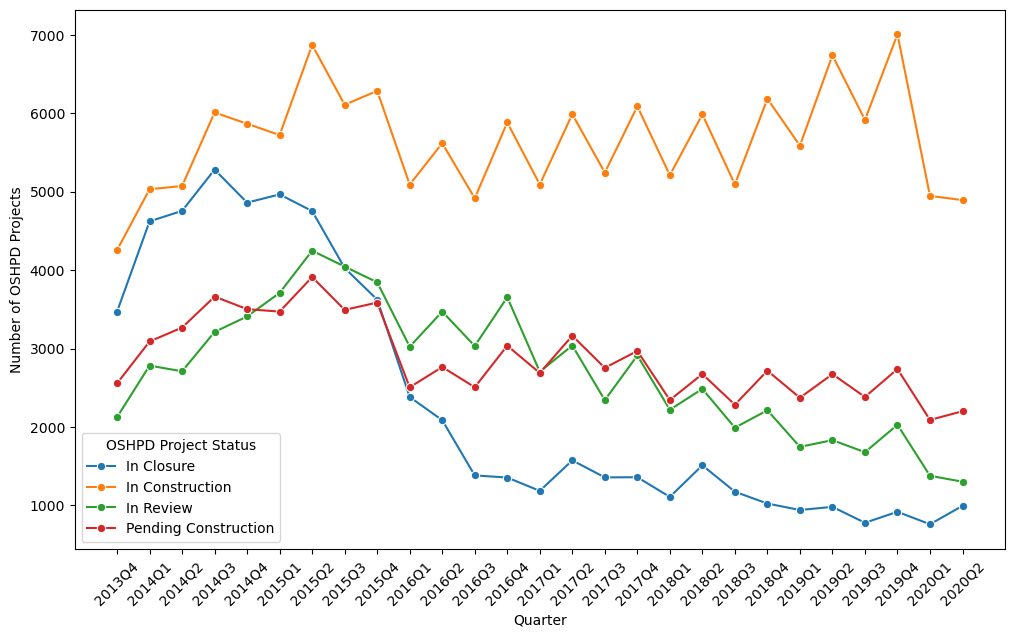

In [14]:
plt.figure(figsize=(12, 7))
plot_df = Los_angeles_df[['OSHPD Project Status',
       'Total Costs of OSHPD Projects', 'Number of OSHPD Projects', 'Quarter']].groupby(['Quarter', 'OSHPD Project Status']).sum().reset_index()
plot_df['Quarter'] = plot_df['Quarter'].astype(str)
f = sns.lineplot(data=plot_df, 
                 x = 'Quarter',
                 y = 'Number of OSHPD Projects', 
         hue = 'OSHPD Project Status', 
         marker='o')
f.set_xticklabels(labels=x_ticks, rotation = 45);

# C: Avarage Cost of Projetcs by Quarter, Broken Down by Project Status


/var/folders/hl/7j2423292gb__6jqs2hjyh2r0000gp/T/ipykernel_57918/2418026099.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=x_ticks, rotation = 45);


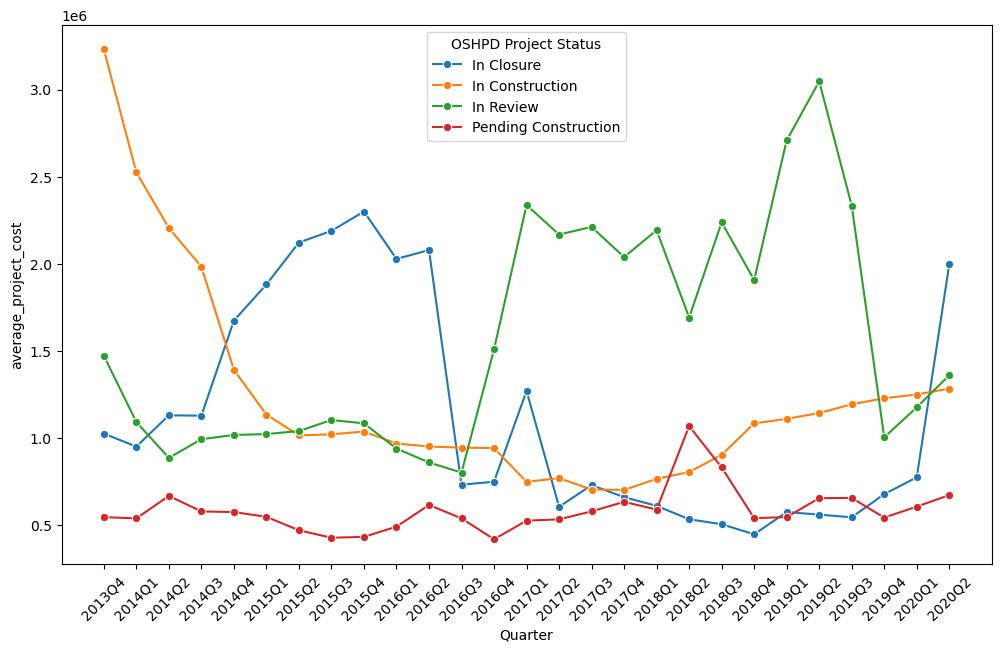

In [15]:
plt.figure(figsize=(12, 7))
plot_df = Los_angeles_df[['OSHPD Project Status',
       'Total Costs of OSHPD Projects', 'Number of OSHPD Projects', 'Quarter']].groupby(['Quarter', 'OSHPD Project Status']).sum().reset_index()

plot_df['average_project_cost'] = plot_df['Total Costs of OSHPD Projects'] / plot_df['Number of OSHPD Projects']
plot_df['Quarter'] = plot_df['Quarter'].astype(str)
f = sns.lineplot(data=plot_df, 
                 x = 'Quarter',
                 y = 'average_project_cost', 
         hue = 'OSHPD Project Status', 
         marker='o')
f.set_xticklabels(labels=x_ticks, rotation = 45);

## Thank you 